# This notebook will train a model to identify a website's customer propensity to purchase.

Insert more here...

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd

pwd = os.getcwd()

path = pwd + "/raw_data/"

training_df = pd.read_csv(path + 'training_sample.csv')

training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [3]:
pwd = os.getcwd()

path = pwd + "/raw_data/"

testing_df = pd.read_csv(path + 'testing_sample.csv')

testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151655 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   151655 non-null  object
 1   basket_icon_click        151655 non-null  int64 
 2   basket_add_list          151655 non-null  int64 
 3   basket_add_detail        151655 non-null  int64 
 4   sort_by                  151655 non-null  int64 
 5   image_picker             151655 non-null  int64 
 6   account_page_click       151655 non-null  int64 
 7   promo_banner_click       151655 non-null  int64 
 8   detail_wishlist_add      151655 non-null  int64 
 9   list_size_dropdown       151655 non-null  int64 
 10  closed_minibasket_click  151655 non-null  int64 
 11  checked_delivery_detail  151655 non-null  int64 
 12  checked_returns_detail   151655 non-null  int64 
 13  sign_in                  151655 non-null  int64 
 14  saw_checkout        

In [4]:
frames = [training_df, testing_df]
combined_df = pd.concat(frames)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607056 entries, 0 to 151654
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   607056 non-null  object
 1   basket_icon_click        607056 non-null  int64 
 2   basket_add_list          607056 non-null  int64 
 3   basket_add_detail        607056 non-null  int64 
 4   sort_by                  607056 non-null  int64 
 5   image_picker             607056 non-null  int64 
 6   account_page_click       607056 non-null  int64 
 7   promo_banner_click       607056 non-null  int64 
 8   detail_wishlist_add      607056 non-null  int64 
 9   list_size_dropdown       607056 non-null  int64 
 10  closed_minibasket_click  607056 non-null  int64 
 11  checked_delivery_detail  607056 non-null  int64 
 12  checked_returns_detail   607056 non-null  int64 
 13  sign_in                  607056 non-null  int64 
 14  saw_checkout        

In [8]:
combined_df.to_csv(os.path.join('raw_data','combined.csv'))

### Exploratory Data Analysis

In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
y = combined_df['ordered']

In [10]:
combined_df.columns.tolist()

['UserID',
 'basket_icon_click',
 'basket_add_list',
 'basket_add_detail',
 'sort_by',
 'image_picker',
 'account_page_click',
 'promo_banner_click',
 'detail_wishlist_add',
 'list_size_dropdown',
 'closed_minibasket_click',
 'checked_delivery_detail',
 'checked_returns_detail',
 'sign_in',
 'saw_checkout',
 'saw_sizecharts',
 'saw_delivery',
 'saw_account_upgrade',
 'saw_homepage',
 'device_mobile',
 'device_computer',
 'device_tablet',
 'returning_user',
 'loc_uk',
 'ordered']

In [15]:
Xb = sm.add_constant(combined_df[['basket_icon_click',
 'basket_add_list',
 'basket_add_detail',
 'sort_by',
 'image_picker',
 'account_page_click',
 'promo_banner_click',
 'detail_wishlist_add',
 'list_size_dropdown',
 'closed_minibasket_click',
 'checked_delivery_detail',
 'checked_returns_detail',
 'sign_in',
 'saw_checkout',
 'saw_sizecharts',
 'saw_delivery',
 'saw_account_upgrade',
 'saw_homepage',
 'device_mobile',
 'device_computer',
 'device_tablet',
 'returning_user',
 'loc_uk']])
mod = sm.OLS(y, Xb)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ordered   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                 5.152e+04
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:23:16   Log-Likelihood:             5.2690e+05
No. Observations:              607056   AIC:                        -1.054e+06
Df Residuals:                  607032   BIC:                        -1.053e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0332      0.002    -13.656      0.000      -0.038      -0.028
basket_icon_click           0.0233      0.001     38.762      0.000       0.022       0.024
basket_add_list             0.0159      0.001     25.433      0.000       0.015       0.017
basket_add_detail           0.0123      0.001     23.447      0.000       0.011       0.013
sort_by                    -0.0015      0.001     -2.036      0.042      -0.003   -5.62e-05
image_picker               -0.0053      0.001     -6.164      0.000      -0.007      -0.004
account_page_click          0.0005      0.002      0.202      0.840      -0.004       0.005
promo_banner_click         -0.0076      0.001     -7.205      0.000      -0.010      -0.006
detail_wishlist_add        -0.0379      0.002    -16.374      0.000      -0.042      -0.033
list_size_dropdown         -0.0030      0.000     -8.176      0.000      -0.004      -0.002
closed_minibasket_click     0.0004      0.001      0.386      0.700      -0.002       0.003
checked_delivery_detail     0.4834      0.001    620.326      0.000       0.482       0.485
checked_returns_detail     -0.2004      0.001   -140.785      0.000      -0.203      -0.198
sign_in                    -0.0087      0.001     -6.386      0.000      -0.011      -0.006
saw_checkout                0.1889      0.001    132.050      0.000       0.186       0.192
saw_sizecharts              0.0013      0.007      0.186      0.852      -0.012       0.015
saw_delivery               -0.2852      0.002   -155.541      0.000      -0.289      -0.282
saw_account_upgrade        -0.0187      0.004     -4.686      0.000      -0.027      -0.011
saw_homepage                0.0034      0.000     11.307      0.000       0.003       0.004
device_mobile               0.0160      0.002      6.719      0.000       0.011       0.021
device_computer             0.0197      0.002      8.264      0.000       0.015       0.024
device_tablet               0.0206      0.002      8.646      0.000       0.016       0.025
returning_user              0.0022      0.000      8.231      0.000       0.002       0.003
loc_uk                      0.0073      0.001     13.871      0.000       0.006       0.008
==============================================================================
Omnibus:                   297376.062   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10336409.020
Skew:                          -1.725   Prob(JB):                         0.00
Kurtosis:                      22.918   Cond. No.                         89.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
Xb = sm.add_constant(combined_df[['basket_icon_click',
 'basket_add_list',
 'basket_add_detail',
 'sort_by',
 'image_picker',
 'promo_banner_click',
 'detail_wishlist_add',
 'list_size_dropdown',
 'checked_delivery_detail',
 'checked_returns_detail',
 'sign_in',
 'saw_checkout',
 'saw_delivery',
 'saw_account_upgrade',
 'saw_homepage',
 'device_mobile',
 'device_computer',
 'device_tablet',
 'returning_user',
 'loc_uk']])
mod = sm.OLS(y, Xb)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ordered   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                 5.925e+04
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:05:04   Log-Likelihood:             5.2690e+05
No. Observations:              607056   AIC:                        -1.054e+06
Df Residuals:                  607035   BIC:                        -1.054e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0332      0.002    -13.670      0.000      -0.038      -0.028
basket_icon_click           0.0234      0.001     39.756      0.000       0.022       0.025
basket_add_list             0.0160      0.001     25.481      0.000       0.015       0.017
basket_add_detail           0.0123      0.001     23.512      0.000       0.011       0.013
sort_by                    -0.0015      0.001     -2.038      0.042      -0.003   -5.75e-05
image_picker               -0.0053      0.001     -6.167      0.000      -0.007      -0.004
promo_banner_click         -0.0076      0.001     -7.200      0.000      -0.010      -0.006
detail_wishlist_add        -0.0379      0.002    -16.425      0.000      -0.042      -0.033
list_size_dropdown         -0.0030      0.000     -8.172      0.000      -0.004      -0.002
checked_delivery_detail     0.4834      0.001    620.342      0.000       0.482       0.485
checked_returns_detail     -0.2003      0.001   -140.841      0.000      -0.203      -0.198
sign_in                    -0.0087      0.001     -6.690      0.000      -0.011      -0.006
saw_checkout                0.1888      0.001    136.870      0.000       0.186       0.192
saw_delivery               -0.2852      0.002   -155.609      0.000      -0.289      -0.282
saw_account_upgrade        -0.0187      0.004     -4.681      0.000      -0.027      -0.011
saw_homepage                0.0034      0.000     11.334      0.000       0.003       0.004
device_mobile               0.0160      0.002      6.732      0.000       0.011       0.021
device_computer             0.0197      0.002      8.274      0.000       0.015       0.024
device_tablet               0.0206      0.002      8.660      0.000       0.016       0.025
returning_user              0.0022      0.000      8.235      0.000       0.002       0.003
loc_uk                      0.0073      0.001     13.871      0.000       0.006       0.008
==============================================================================
Omnibus:                   297374.789   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10336256.999
Skew:                          -1.725   Prob(JB):                         0.00
Kurtosis:                      22.918   Cond. No.                         62.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



In [ ]:
#data = pd.read_csv("D://Blogs//train.csv")
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features

In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(Xb,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xb.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                      Specs          Score
11  checked_delivery_detail  326626.802585
14             saw_checkout  240689.554102
13                  sign_in  206852.200240
1         basket_icon_click   81067.663603
3         basket_add_detail   74680.333838
2           basket_add_list   36825.119311
10  closed_minibasket_click    9396.580890
9        list_size_dropdown    8642.773050
18             saw_homepage    8043.826080
5              image_picker    2299.525035
12   checked_returns_detail    1614.974382
6        account_page_click    1535.572910
7        promo_banner_click    1505.926769
4                   sort_by    1304.202502
20          device_computer     841.780939


In [8]:
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

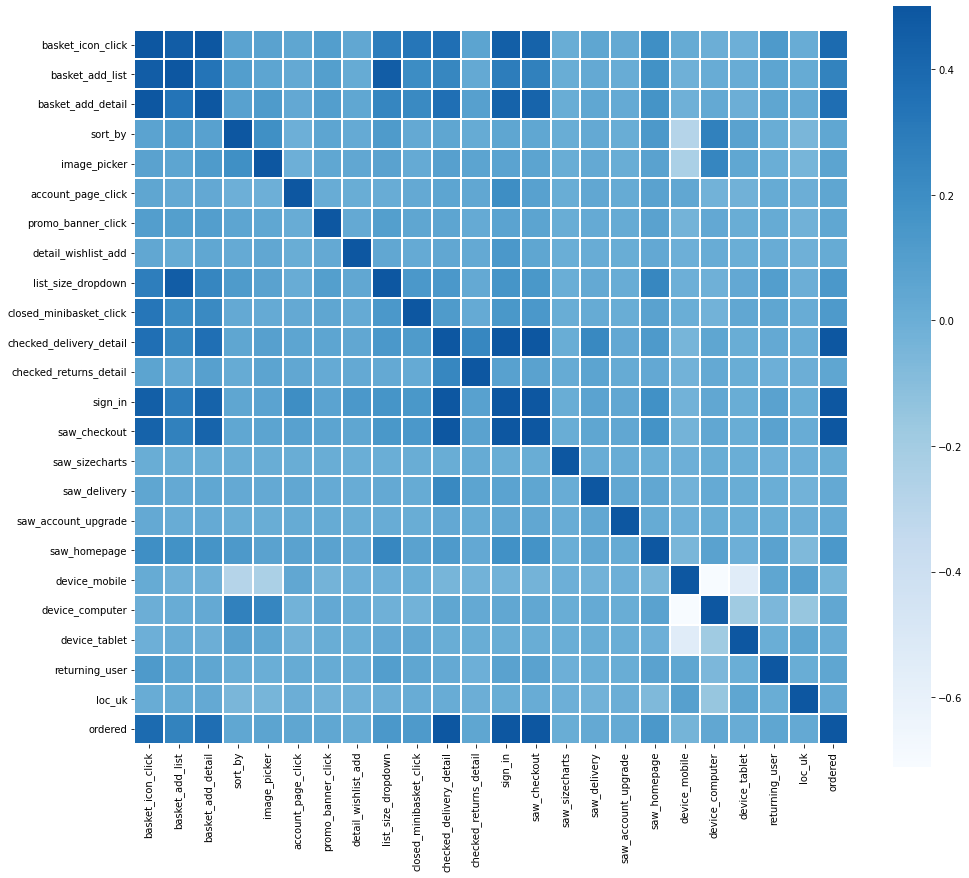

In [13]:
import seaborn as sns
import matplotlib.pylab as plt
corr = combined_df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [20]:
predictors = training_df.drop(['ordered','UserID'], axis=1)
targets = training_df.ordered

In [21]:
print(predictors.columns)

Index(['basket_icon_click', 'basket_add_list', 'basket_add_detail', 'sort_by',
       'image_picker', 'account_page_click', 'promo_banner_click',
       'detail_wishlist_add', 'list_size_dropdown', 'closed_minibasket_click',
       'checked_delivery_detail', 'checked_returns_detail', 'sign_in',
       'saw_checkout', 'saw_sizecharts', 'saw_delivery', 'saw_account_upgrade',
       'saw_homepage', 'device_mobile', 'device_computer', 'device_tablet',
       'returning_user', 'loc_uk'],
      dtype='object')


In [22]:
X_train, X_test, y_train, y_test  =   train_test_split(predictors, targets, test_size=.3)

print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )

Predictor - Training :  (318780, 23) Predictor - Testing :  (136621, 23)


In [25]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier=classifier.fit(X_train, y_train)

predictions=classifier.predict(X_test)

#Analyze accuracy of predictions
sklearn.metrics.confusion_matrix(y_test,predictions)

array([[129291,   1626],
       [    64,   5640]], dtype=int64)

In [26]:
sklearn.metrics.accuracy_score(y_test, predictions)

0.9876300129555485

In [27]:
userids = testing_df.UserID

testing_df = testing_df.drop(['ordered','UserID'], axis=1)

print(testing_df.head(10))

   basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  1        0   
4                  0                0                  0        0   
5                  1                0                  1        0   
6                  0                0                  0        0   
7                  0                0                  0        0   
8                  1                1                  1        0   
9                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   


In [28]:
testing_df.shape

(151655, 23)

In [30]:
testing_df['propensity'] = classifier.predict_proba(testing_df)[:,1]

print(testing_df.head())

   basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                0                  0        0   
3                  0                0                  1        0   
4                  0                0                  0        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   0                    0   
1             0                   0                   0                    0   
2             0                   0                   0                    0   
3             0                   0                   0                    0   
4             0                   0                   0                    0   

   list_size_dropdown  closed_minibasket_click  ...  saw_sizecharts  \
0                   0            

In [31]:
pd.DataFrame(userids)
results = pd.concat([userids, testing_df], axis=1)

In [33]:
print(results.head(30))

                                 UserID  basket_icon_click  basket_add_list  \
0   9d24-25k4-47889d24-25k4-494b-398124                  0                0   
1   7732-1k58-47887732-1k58-4475-679678                  0                0   
2   94k2-632j-471394k2-632j-4b4j-228160                  0                0   
3   jdd8-419d-4714jdd8-419d-4198-674376                  0                0   
4   7473-7595-47147473-7595-4757-227547                  0                0   
5   7j3d-j382-47157j3d-j382-4d3b-955343                  1                0   
6   bb4d-8019-4715bb4d-8019-4d42-763898                  0                0   
7   d09k-j446-4716d09k-j446-4469-572703                  0                0   
8    1397-7143-47171397-7143-4969-95351                  1                1   
9   3j36-dj4d-47183j36-dj4d-4478-404497                  0                0   
10   82b1-659j-471882b1-659j-45j1-32901                  0                0   
11  dj8d-141k-4718dj8d-141k-42db-743965             

In [38]:
pwd = os.getcwd()

path = pwd + "/export_data/"

results.to_csv(path + 'customer_results.csv')